In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score

np.random.seed(42)

In [2]:
dataset = np.genfromtxt('./Dados/penguins.csv', delimiter=',')

In [3]:
X = dataset[:, 0:4]
y = dataset[:, -1]

In [4]:
class xscale():
 def __init__(self):
  self.mean = None
  self.dp = None
 def fit(self, data):
  self.mean = data.mean(axis=0)
  self.dp = data.std(axis=0)
 def transform(self, data):
  return (data - self.mean) / self.dp

 def inversa(self, data):
  return (data * self.dp) + self.mean

In [5]:
schedr_X = xscale()
schedr_X.fit(X)
X_sched = schedr_X.transform(X)

## Questão 2 - PCA

In [6]:
class PCA():
    def __init__(self):
        self.cov = None
        self.autovalores = None
        self.autovetores = None
        self.explained_variance = None
    def fit(self, X):
        self.cov = np.cov(X.T)
        self.autovalores, self.autovetores = np.linalg.eig(self.cov)
        self.explained_variance = self.autovalores/np.sum(self.autovalores)
    def transform(self, X, m):
        self.P = self.autovetores[0:m]
        self.u = np.mean(X, axis=0)
        self.z = (X - self.u) @ self.P.T
        return self.z  
    def inverse_transform(self):
        return self.z @ self.P + self.u

In [7]:
pca = PCA()
pca.fit(X_sched)
z = pca.transform(X_sched, 2)

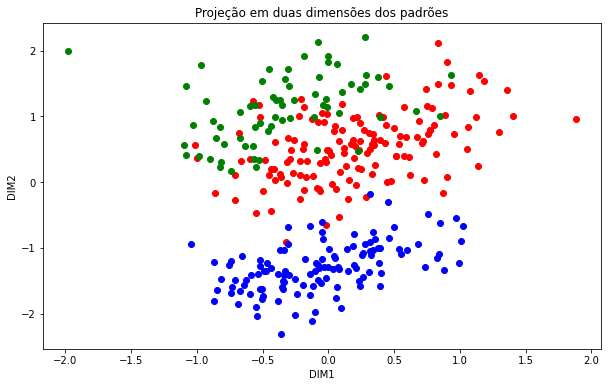

In [8]:
classes = np.unique(y)
plt.figure(figsize=(10,6))
plt.scatter(z[:,0][y==classes[0]],z[:,1][y==classes[0]], c= 'r')
plt.scatter(z[:,0][y==classes[1]],z[:,1][y==classes[1]], c= 'g')
plt.scatter(z[:,0][y==classes[2]],z[:,1][y==classes[2]], c= 'b')
plt.xlabel("DIM1")
plt.ylabel("DIM2")
plt.title("Projeção em duas dimensões dos padrões")
plt.show()

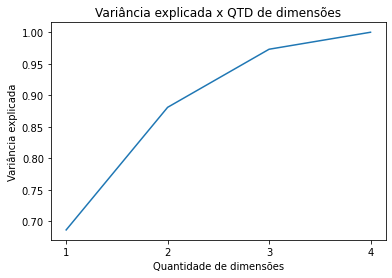

In [9]:
var_acumulada = pca.explained_variance.cumsum()
ticks = list(range(1,5))
plt.plot(ticks,var_acumulada)
plt.ylabel("Variância explicada")
plt.xlabel("Quantidade de dimensões")
plt.title("Variância explicada x QTD de dimensões")
plt.xticks(ticks=ticks)
plt.show()